In [1]:
#IMPORT LIBRARIES 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, r2_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE


from mpl_toolkits.basemap import Basemap


from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC  
from sklearn.svm import LinearSVC

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report

In [2]:
#LOADING DATA
data = pd.read_csv('credit_card_transactions.csv')
data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [3]:
#FEATURE SELECTION
nan_count = data['merch_zipcode'].isna().sum()

# Assuming df is your DataFrame
total_rows = data.shape[0]

fraud_rows = data[data['is_fraud'] == 1].shape[0]


print(total_rows)
print(fraud_rows)

1296675
7506


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
#FEATURE ENGINEERING AND PREPROCESSING
categorical_features = ['merchant', 'category', 'gender', 'city', 'state', 'job']
numeric_features = ['amt', 'city_pop']
# Split into X (features) and y (target)
x = data.drop(columns=['is_fraud'])
y = data['is_fraud']
# Preprocessor: OneHotEncoding categorical variables and scaling numeric ones
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features), 
        ('num', StandardScaler(), numeric_features)
    ])

In [6]:
# Preprocessing pipeline (without SMOTE)
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [7]:
#TRAIN AND TEST SLIP
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [16]:
#LOGISTIC REGRESSION
# Preprocess the data
x_train_preprocessed = pipeline.fit_transform(x_train)
x_test_preprocessed = pipeline.transform(x_test)

# Apply SMOTE separately after preprocessing
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_preprocessed, y_train)

# LOGISTIC REGRESSION MODEL
logreg = LogisticRegression(max_iter=1000)

# Train the model on the resampled data
logreg.fit(x_train_resampled, y_train_resampled)

# Make predictions
y_pred = logreg.predict(x_test_preprocessed)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[348003  38715]
 [   426   1859]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    386718
           1       0.05      0.81      0.09      2285

    accuracy                           0.90    389003
   macro avg       0.52      0.86      0.52    389003
weighted avg       0.99      0.90      0.94    389003


Accuracy Score:
0.8993812387051


Confusion Matrix:
[[385756    962]
 [   686   1599]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.62      0.70      0.66      2285

    accuracy                           1.00    389003
   macro avg       0.81      0.85      0.83    389003
weighted avg       1.00      1.00      1.00    389003


Accuracy Score:
0.9957635288159732


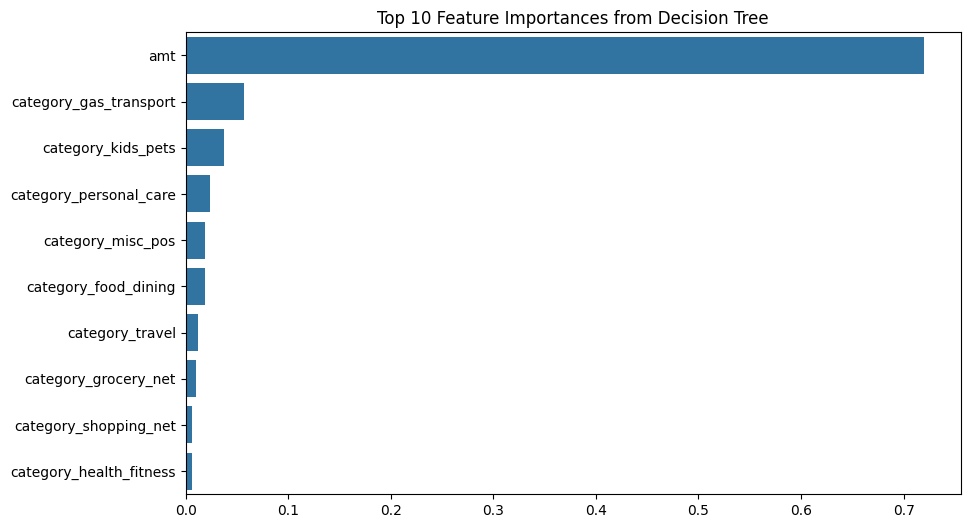

In [10]:
# DECISION TREE CLASSIFIER
tree = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled data
tree.fit(x_train_resampled, y_train_resampled)

# Make predictions
y_pred = tree.predict(x_test_preprocessed)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Get feature importances from the decision tree
importances = tree.feature_importances_

# Get feature names for categorical and numeric columns
encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = encoder.get_feature_names_out(categorical_features)

# Combine encoded categorical features with the numeric features
feature_names = np.hstack((encoded_cat_features, numeric_features))

# Sort feature importances and feature names in descending order
indices = np.argsort(importances)[::-1]
top_n = 10  # Show only the top 10 most important features
top_indices = indices[:top_n]

# Plotting top n feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[top_indices], y=np.array(feature_names)[top_indices])
plt.title(f'Top {top_n} Feature Importances from Decision Tree')
plt.show()

Confusion Matrix:
[[375739  10979]
 [   584   1701]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    386718
           1       0.13      0.74      0.23      2285

    accuracy                           0.97    389003
   macro avg       0.57      0.86      0.61    389003
weighted avg       0.99      0.97      0.98    389003


Accuracy Score:
0.9702752935067339


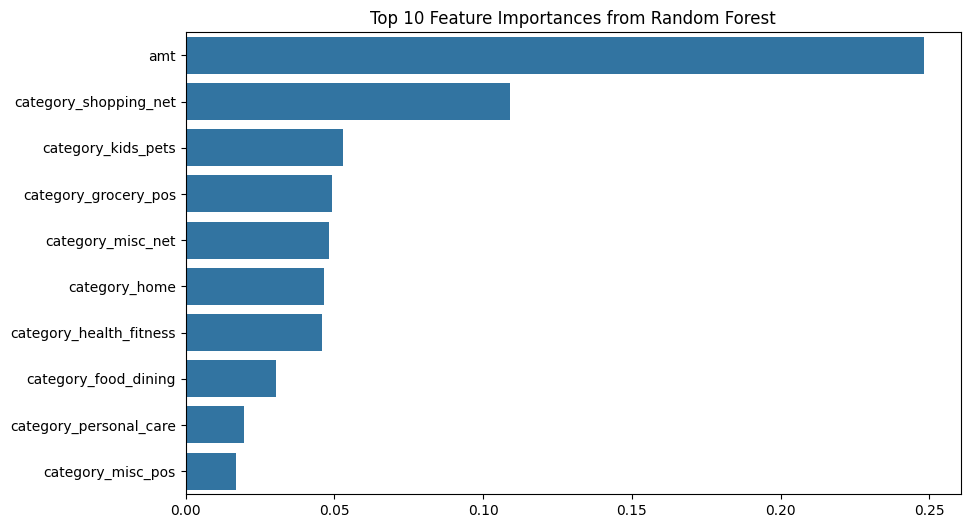

In [9]:
# RANDOM FOREST CLASSIFIER
# Preprocess the data
x_train_preprocessed = pipeline.fit_transform(x_train)
x_test_preprocessed = pipeline.transform(x_test)

# Apply SMOTE separately after preprocessing
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_preprocessed, y_train)

rf = RandomForestClassifier(n_estimators=50,max_depth=10, random_state=42)

# Train the model on the resampled data
rf.fit(x_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf.predict(x_test_preprocessed)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualizing Feature Importance
importances = rf.feature_importances_

# Get feature names for categorical and numeric columns
encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = encoder.get_feature_names_out(categorical_features)

# Combine encoded categorical features with the numeric features
feature_names = np.hstack((encoded_cat_features, numeric_features))

# Sort feature importances and feature names in descending order
indices = np.argsort(importances)[::-1]
top_n = 10  # Show only the top 10 most important features
top_indices = indices[:top_n]

# Plotting top n feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[top_indices], y=np.array(feature_names)[top_indices])
plt.title(f'Top {top_n} Feature Importances from Random Forest')
plt.show()

In [12]:
# SUPPORT VECTOR MACHINE (SVM) CLASSIFIER
# Use LinearSVC which is optimized for large datasets
svm = LinearSVC(random_state=42, max_iter=5000)  # Increase max_iter if needed
svm.fit(x_train_resampled, y_train_resampled)

# Make predictions
y_pred = svm.predict(x_test_preprocessed)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[346577  40141]
 [   436   1849]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.94    386718
           1       0.04      0.81      0.08      2285

    accuracy                           0.90    389003
   macro avg       0.52      0.85      0.51    389003
weighted avg       0.99      0.90      0.94    389003


Accuracy Score:
0.8956897504646494


/var/folders/2_/n4q4vncj48z_lyzjv8xs8gnh0000gn/T/ipykernel_50845/3599630750.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_data, x='category', palette='Set2')


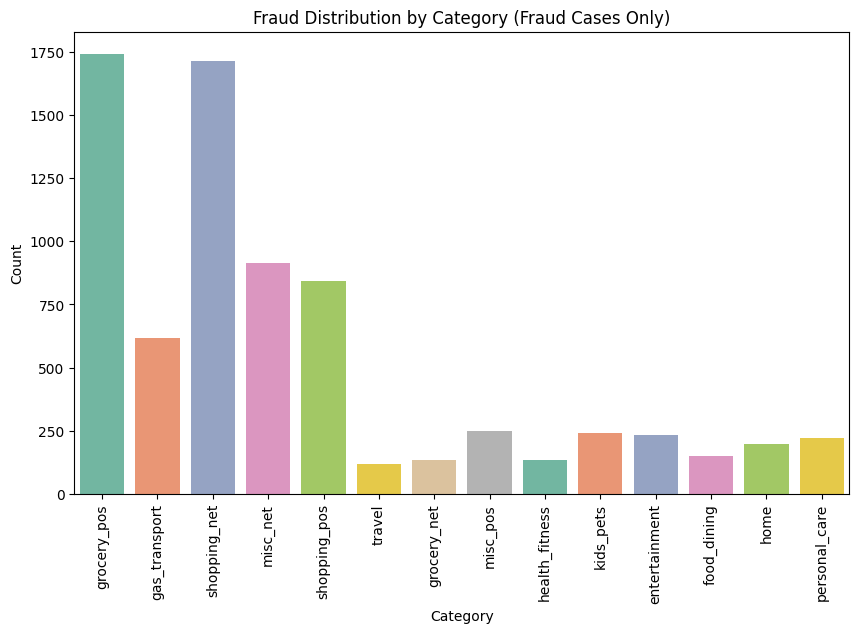

In [13]:
#DATA SET CARACTERISATION 
# Fraud distribution by category
# Filter the dataset to include only fraud cases
fraud_data = data[data['is_fraud'] == 1]

# Fraud distribution by category for fraud cases only
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_data, x='category', palette='Set2')
plt.title('Fraud Distribution by Category (Fraud Cases Only)')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


/var/folders/2_/n4q4vncj48z_lyzjv8xs8gnh0000gn/T/ipykernel_44673/4217691486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_merchant.index, y=fraud_by_merchant.values, palette='Set1')


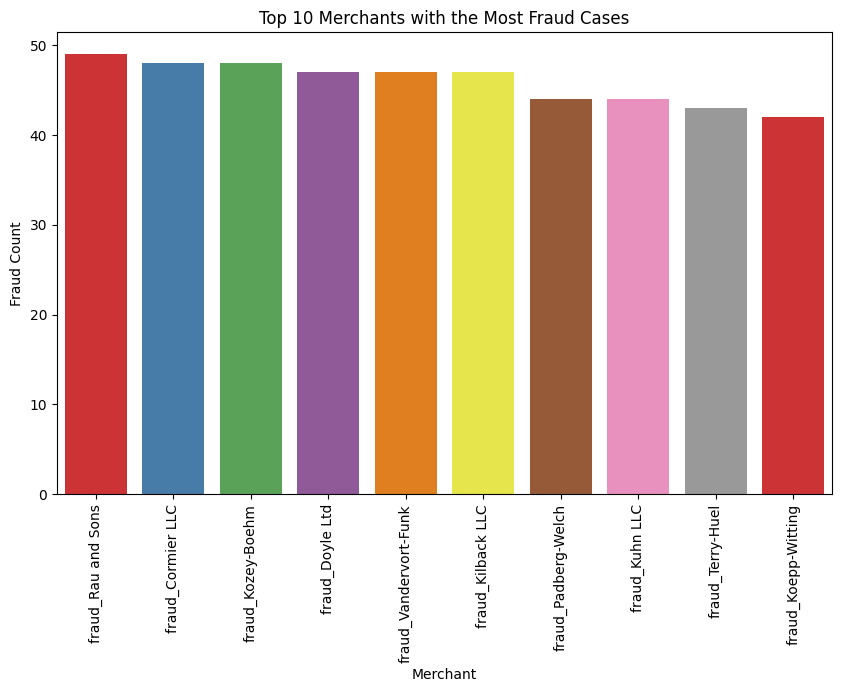

In [27]:
# Top 10 merchants with the most fraud cases
fraud_by_merchant = data[data['is_fraud'] == 1]['merchant'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_merchant.index, y=fraud_by_merchant.values, palette='Set1')
plt.title('Top 10 Merchants with the Most Fraud Cases')
plt.xticks(rotation=90)
plt.xlabel('Merchant')
plt.ylabel('Fraud Count')
plt.show()


/var/folders/2_/n4q4vncj48z_lyzjv8xs8gnh0000gn/T/ipykernel_50845/3033390010.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_data, x='state', palette='Set1')


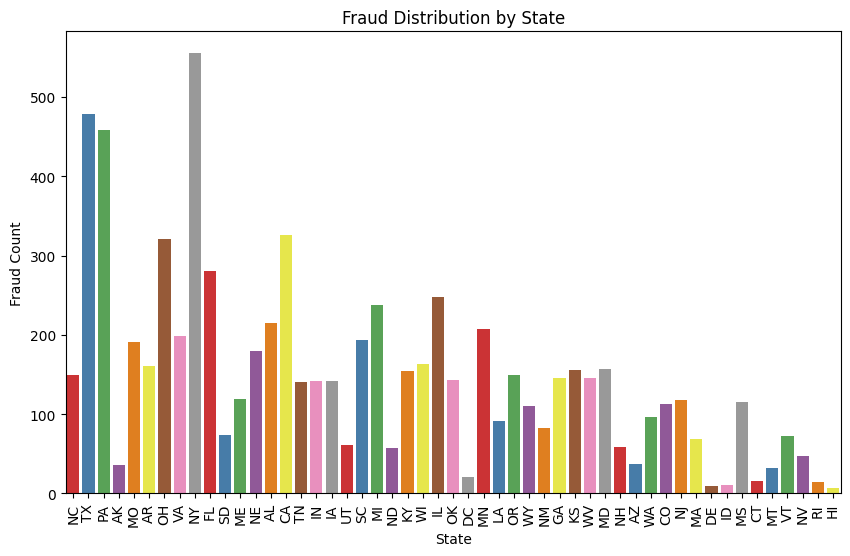

In [14]:
# Fraud distribution by state
# Filter the data to include only fraud cases
fraud_data = data[data['is_fraud'] == 1]

# Plot the fraud distribution by state
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_data, x='state', palette='Set1')
plt.title('Fraud Distribution by State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Fraud Count')
plt.show()


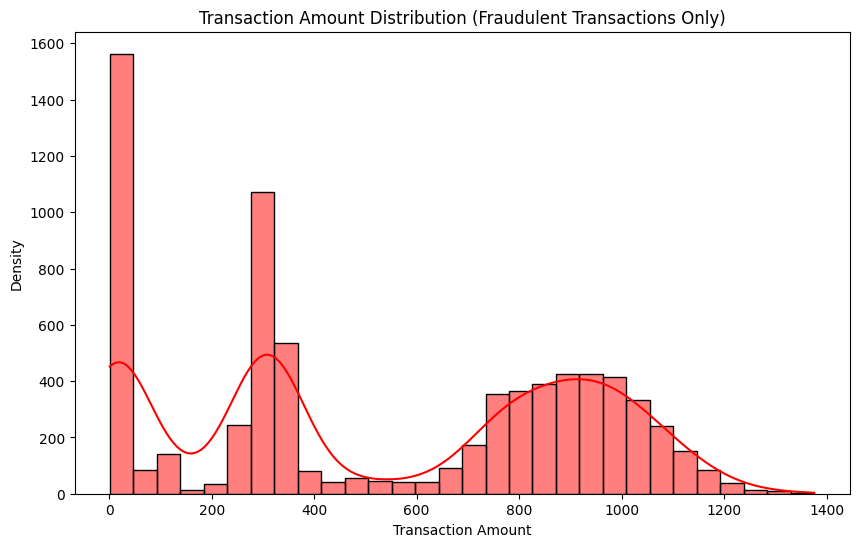

In [15]:

# Distribution of transaction amounts for fraudulent transactions only
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data['is_fraud'] == 1], x='amt', kde=True, color='red', bins=30)
plt.title('Transaction Amount Distribution (Fraudulent Transactions Only)')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()



/var/folders/2_/n4q4vncj48z_lyzjv8xs8gnh0000gn/T/ipykernel_48463/4091240267.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_data, x='gender', palette='Set1')


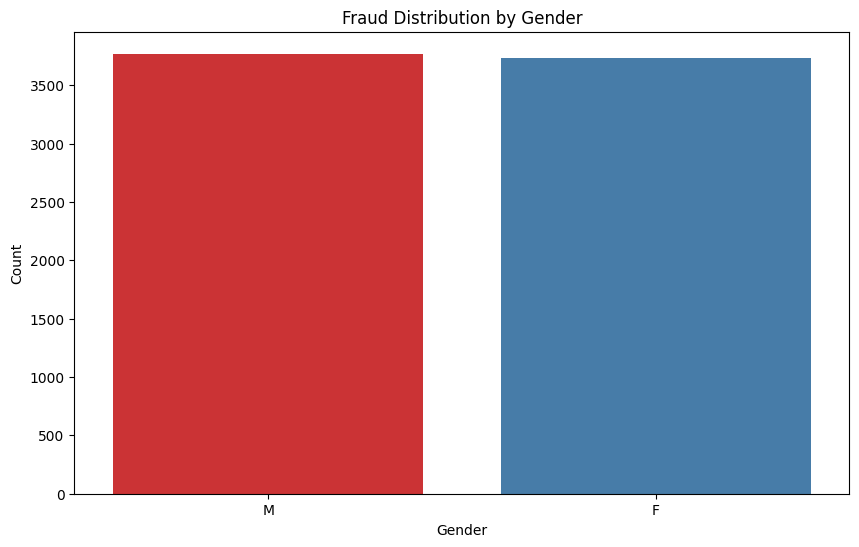

In [10]:
# Filter the data for fraudulent cases only
fraud_data = data[data['is_fraud'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_data, x='gender', palette='Set1')
plt.title('Fraud Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


/var/folders/2_/n4q4vncj48z_lyzjv8xs8gnh0000gn/T/ipykernel_56700/161393204.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fraud_data, x='is_fraud', y='city_pop', palette='Set2')


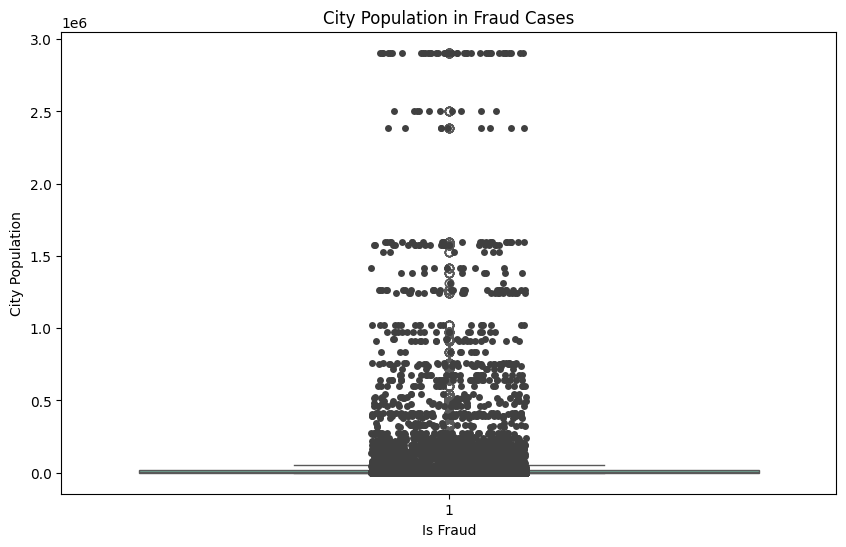

In [15]:
# Boxplot of fraud by city population
# Filter the data to include only fraud cases
fraud_data = data[data['is_fraud'] == 1]

# Boxplot of fraud cases by city population
plt.figure(figsize=(10, 6))

# Boxplot for city populations in fraud cases
sns.boxplot(data=fraud_data, x='is_fraud', y='city_pop', palette='Set2')

# Stripplot for individual points
sns.stripplot(data=fraud_data, x='is_fraud', y='city_pop', color=".25", jitter=True)

# Update title and labels
plt.title('City Population in Fraud Cases')
plt.xlabel('Is Fraud')
plt.ylabel('City Population')

# Show plot
plt.show()


/var/folders/2_/n4q4vncj48z_lyzjv8xs8gnh0000gn/T/ipykernel_44673/3962015461.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=fraud_cases, x='hour', kde=True, palette='Set2', bins=24)


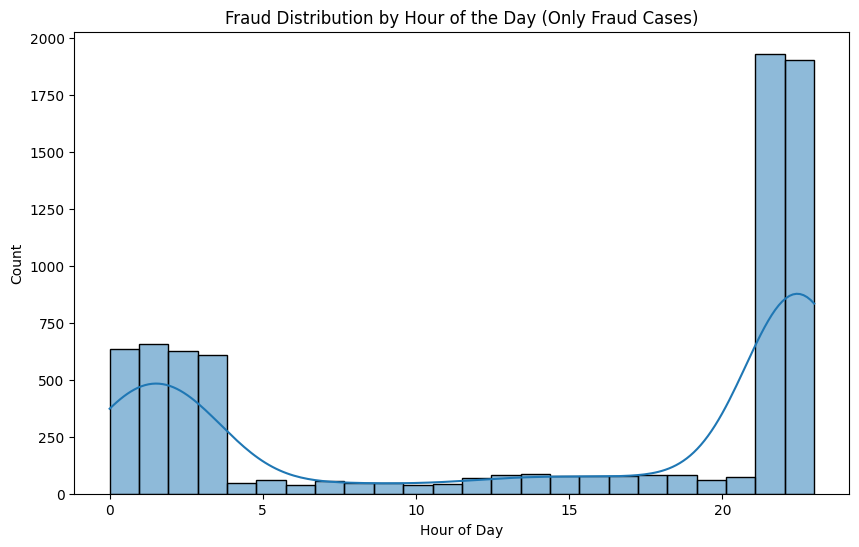

In [38]:
# Convert transaction time to datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extract the hour from the transaction time
data['hour'] = data['trans_date_trans_time'].dt.hour

# Filter the data to include only fraud cases
fraud_cases = data[data['is_fraud'] == 1]

# Fraud distribution by time of day for fraud cases only
plt.figure(figsize=(10, 6))
sns.histplot(data=fraud_cases, x='hour', kde=True, palette='Set2', bins=24)
plt.title('Fraud Distribution by Hour of the Day (Only Fraud Cases)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

/var/folders/2_/n4q4vncj48z_lyzjv8xs8gnh0000gn/T/ipykernel_44673/1118232271.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_job.values, y=fraud_by_job.index, palette='Set2')


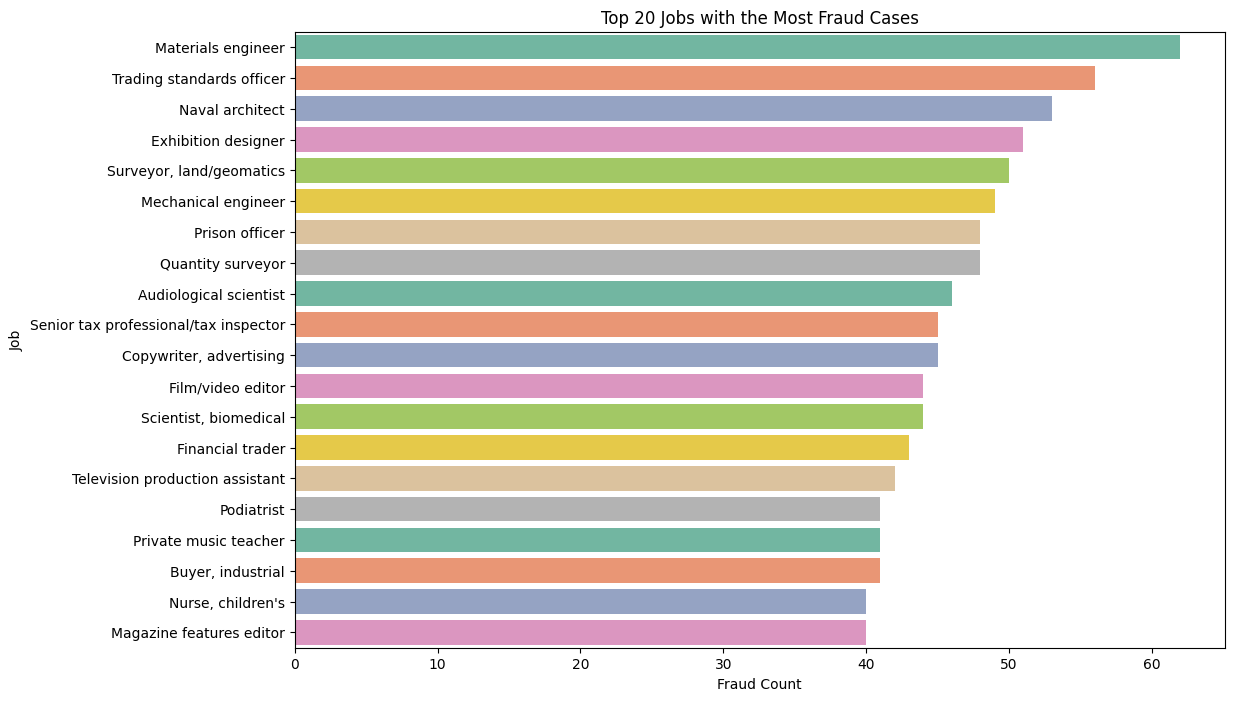

In [37]:
# Top 20 jobs with the most fraud cases
fraud_by_job = data[data['is_fraud'] == 1]['job'].value_counts().nlargest(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=fraud_by_job.values, y=fraud_by_job.index, palette='Set2')
plt.title('Top 20 Jobs with the Most Fraud Cases')
plt.xlabel('Fraud Count')
plt.ylabel('Job')
plt.show()


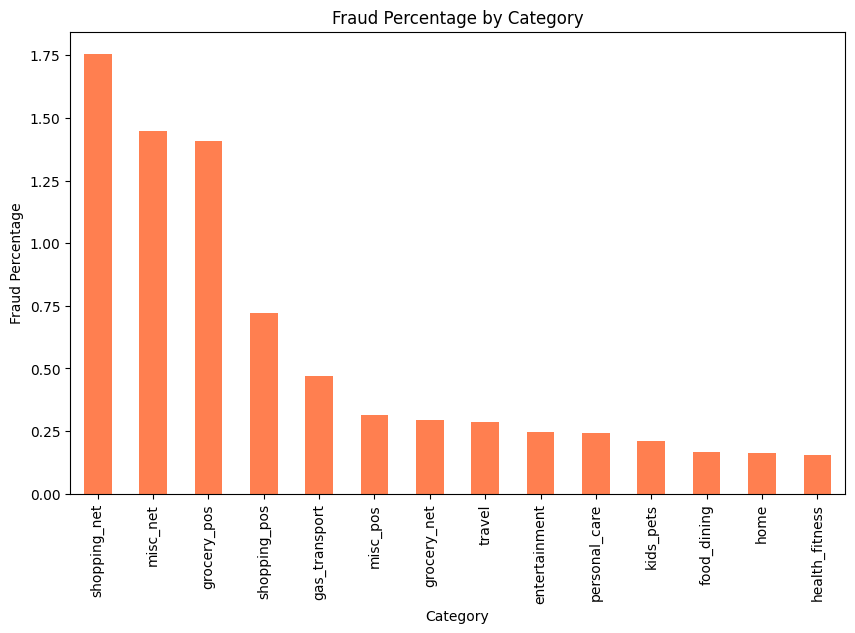

In [34]:
# Percentage of fraud per category
category_fraud_percentage = data.groupby('category')['is_fraud'].mean() * 100

plt.figure(figsize=(10, 6))
category_fraud_percentage.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Fraud Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=90)
plt.show()
